In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Loading data 

In [2]:
X_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv').squeeze()

X_train = pd.read_csv('x_train_balanced.csv')
y_train = pd.read_csv('y_train_balanced.csv').squeeze()  # Ensure it becomes a Series


### Modelling

In [14]:

# Function to plot all model metrics on a single line chart
def plot_all_model_metrics(metrics_dict):
    fig, ax = plt.subplots(figsize=(10, 6))
    metric_names = list(next(iter(metrics_dict.values())).keys())
    
    for model_name, model_metrics in metrics_dict.items():
        scores = list(model_metrics.values())
        ax.plot(metric_names, scores, marker='o', linestyle='-', label=model_name)
    
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Model Metrics')
    ax.set_ylim([0, 1])  # Assuming score metrics are between 0 and 1
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
models_params = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 150, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [None, 3, 5, 10, 15, 20, 25],
            'min_samples_split': [2, 5, 16, 20],
            'min_samples_leaf': [1, 2, 4, 8]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200, 300],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200, 250, 300],
            'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.001],
            'max_depth': [3, 6, 8, 10, 12, 15, 20, 25]
        }
    }
}


In [ ]:
best_estimators = {}
for model_name, mp in models_params.items():
    random_search = RandomizedSearchCV(mp['model'], mp['params'], n_iter=5, cv=3, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    best_estimators[model_name] = random_search.best_estimator_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")


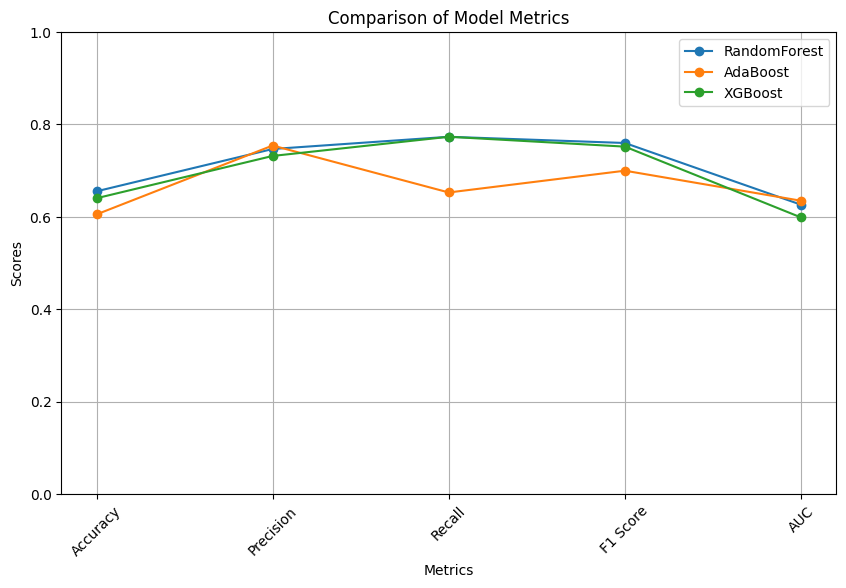

In [15]:

# Evaluate the models and plot metrics
metrics = {}
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    model_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }
    metrics[model_name] = model_metrics

# Plot metrics for all models together in one chart
plot_all_model_metrics(metrics)